# SIGN LANGUAGE CLASSIFICATION USING MNIST DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import warnings 
#warnings.filterwarnings("ignore")
from sklearn import metrics 
from sklearn.decomposition import PCA
#plt.rcParams["figure.figsize"] = (14,8)

In [2]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S','T', 'U', 'V', 'W', 'X', 'Y']

##### Loading Dataset

In [3]:
train_df = pd.read_csv("data/sign_mnist_train.csv")
test_df = pd.read_csv("data/sign_mnist_test.csv")
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
print(train_df.shape)
print(test_df.shape)

(27455, 785)
(7172, 785)


### Visualize the Dataset

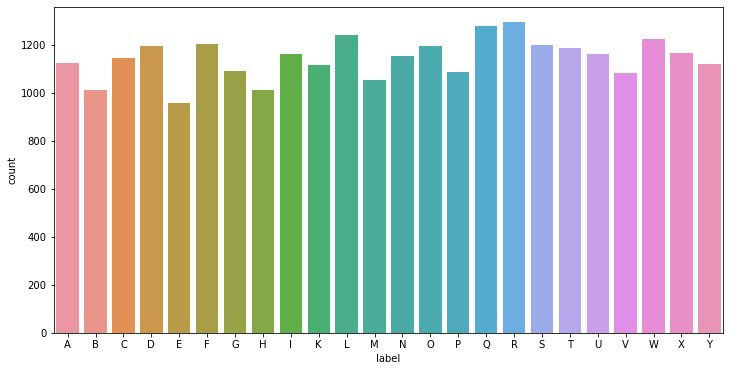

In [8]:
# Checking distribution of each label
plt.figure(figsize=(12,6))
count_plot = sns.countplot(x="label",data=train_df)
count_plot.set_xticklabels(letters)
fig = count_plot.get_figure()
fig.savefig("results/letters_count.png") 


In [9]:
X_train = train_df.iloc[:, 1:].to_numpy()/255
X_test = test_df.iloc[:, 1:].to_numpy()/255
y_train = train_df['label'].to_numpy()
y_test  = test_df['label'].to_numpy()

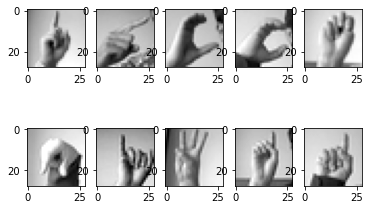

In [10]:
# Plot few images
fig, ax = plt.subplots(2,5) 
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1


In [11]:
pca = PCA().fit(X_train)

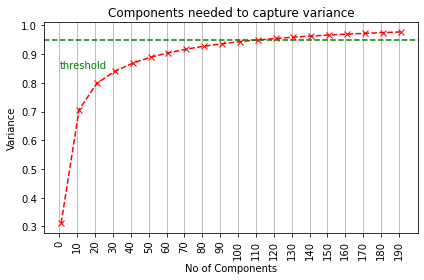

113 component require for 95% variance


In [13]:
# Principal component analysis


fig, ax = plt.subplots()

x = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x[:200:10], y[:200:10], marker='x', linestyle='--', color='r')
plt.xlabel('No of Components')
plt.xticks(np.arange(0, 200, step=10),rotation=90)
plt.ylabel('Variance')
plt.title('Components needed to capture variance')

plt.axhline(y=0.95, color='green', linestyle='--')
plt.text(0.5, 0.85, 'threshold', color = 'green')

ax.grid(axis='x')
plt.tight_layout()
plt.savefig("./results/pca.jpg")
plt.show()

for i,j in zip(x,y):
    if(j>0.95):
        print(f"{i} component require for 95% variance")
        break